Link to Medium.com blogpost: https://seantay96.medium.com/how-item-review-scores-affect-the-sale-of-products-an-eda-on-olist-7e21de3f4514

## **Do attributes such as review scores affect the sale of products? - an EDA on Olist**
# **EDA Goal**
Ascertain which key attributes of the business processes drive sales of products.
# **A Sub-Question**
What factors predict sales outcome; what is the importance of review scores as compared with other factors?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install pandasql

In [5]:
import pandasql as pysql
from pandasql import sqldf

# **Initial Analysis to Examine and Explore the Data**



In [12]:
custframe = pd.read_csv('olist_customers_dataset.csv')
custframe.head()
#custframe.shape total num of rows and columns
#custframe.info() info about the frame

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [39]:
geolocframe = pd.read_csv('olist_geolocation_dataset.csv')
geolocframe.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [38]:
orderitemsframe = pd.read_csv('olist_order_items_dataset.csv')
orderitemsframe.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [67]:
orderpaymentsframe = pd.read_csv('olist_order_payments_dataset.csv')
orderpaymentsframe.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [42]:
orderreviewsframe = pd.read_csv('olist_order_reviews_dataset.csv')
orderreviewsframe.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [41]:
ordersframe = pd.read_csv('olist_orders_dataset.csv')
ordersframe.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [35]:
productsframe = pd.read_csv('olist_products_dataset.csv')
productsframe.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [34]:
sellersframe = pd.read_csv('olist_sellers_dataset.csv')
sellersframe.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [14]:
#Top locations of buyers
groupedcustframe = custframe.groupby("customer_city")
groupedcustframe.size().nlargest(10).reset_index(name='top10')   

,customer_city,top10
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [16]:
#Top location of sellers
groupedsellersframe = sellersframe.groupby("seller_city")
groupedsellersframe.size().nlargest(10).reset_index(name='top10')

,seller_city,top10
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


In [38]:
#Percent of customers per city
custframe = pd.read_csv('olist_customers_dataset.csv')
percentcustspercity = pysql.sqldf("SELECT (count(customer_id)/(SELECT count(customer_id)/100.00 FROM custframe)), customer_city \
FROM custframe Group by customer_city Order by count(customer_id) desc;")
print(percentcustspercity)

      (count(customer_id)/(SELECT count(customer_id)/100.00 FROM custframe))    customer_city
0                                             15.627357                             sao paulo
1                                              6.920687                        rio de janeiro
2                                              2.788588                        belo horizonte
3                                              2.142979                              brasilia
4                                              1.529550                              curitiba
...                                                 ...                                   ...
4114                                           0.001006                       vitoria do jari
4115                                           0.001006                              vitorino
4116                                           0.001006                             vitorinos
4117                                           0.001006     

In [37]:
#Percent of sellers per city
sellersframe = pd.read_csv('olist_sellers_dataset.csv')
percentsellerspercity = pysql.sqldf("SELECT (count(seller_id)/(SELECT count(seller_id)/100.00 FROM sellersframe)), seller_city \
FROM sellersframe Group by seller_city Order by count(seller_id) desc LIMIT 10;")
print(percentsellerspercity)

   (count(seller_id)/(SELECT count(seller_id)/100.00 FROM sellersframe))     seller_city
0                                          22.423263                           sao paulo
1                                           4.103393                            curitiba
2                                           3.101777                      rio de janeiro
3                                           2.197092                      belo horizonte
4                                           1.680129                      ribeirao preto
5                                           1.615509                           guarulhos
6                                           1.583199                            ibitinga
7                                           1.453958                         santo andre
8                                           1.324717                            campinas
9                                           1.292407                             maringa


In [52]:
#Average review score per order status
ordersframe = pd.read_csv('olist_orders_dataset.csv')
orderreviewsframe = pd.read_csv('olist_order_reviews_dataset.csv')
avgrevscoreperordstat = pysql.sqldf("SELECT distinct ord.order_status, avg(rev.review_score) \
FROM ordersframe AS ord JOIN orderreviewsframe AS rev ON ord.order_id = rev.order_id \
GROUP BY order_status LIMIT 1000;")
print(avgrevscoreperordstat)

  order_status  avg(rev.review_score)
0     approved               2.500000
1     canceled               1.810811
2      created               1.800000
3    delivered               4.142267
4     invoiced               1.650943
5   processing               1.274834
6      shipped               1.995528
7  unavailable               1.527005


In [58]:
#Number of reviews per review score
orderreviewsframe = pd.read_csv('olist_order_reviews_dataset.csv')
numrevperrevscore = pysql.sqldf("SELECT count(distinct order_id), review_score \
FROM orderreviewsframe \
GROUP BY review_score;")
print(numrevperrevscore)

   count(distinct order_id)  review_score
0                     11827             1
1                      3232             2
2                      8268             3
3                     19155             4
4                     57168             5


In [66]:
#Number of Reviews per Review Score per Shipping Status
ordersframe = pd.read_csv('olist_orders_dataset.csv')
orderreviewsframe = pd.read_csv('olist_order_reviews_dataset.csv')

numrevperrevscorepershipstat = pysql.sqldf("SELECT distinct ord.order_status, rev.review_score, count(rev.review_score) as num_review_scores \
FROM ordersframe AS ord JOIN orderreviewsframe AS rev ON ord.order_id = rev.order_id GROUP BY order_status, review_score ORDER BY order_status, review_score LIMIT 1000;")
print(numrevperrevscorepershipstat)

   order_status  review_score  num_review_scores
0      approved             1                  1
1      approved             4                  1
2      canceled             1                436
3      canceled             2                 45
4      canceled             3                 50
5      canceled             4                 27
6      canceled             5                 71
7       created             1                  4
8       created             5                  1
9     delivered             1               9754
10    delivered             2               3015
11    delivered             3               8056
12    delivered             4              19040
13    delivered             5              57150
14     invoiced             1                235
15     invoiced             2                 26
16     invoiced             3                 16
17     invoiced             4                 15
18     invoiced             5                 26
19   processing     

# **Addressing the Subquestion -- What factors predict sales outcome? What is the importance of review scores as compared with other factors?**

# **Review Score v Revenue**
Tableau


Create a bin for attribute “review score”

Select “review score - bin” on Columns and sum(price) on Rows


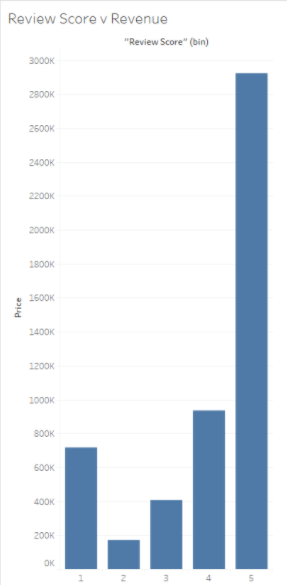

**Insight: A higher review score corresponds to more revenue**

# **Order status vs Revenue**
Tableau


Create a bin for attribute “Review Creation Date”

Select “Order Status” and “Review Creation Date” on Columns and Sum(PRICE) on Rows


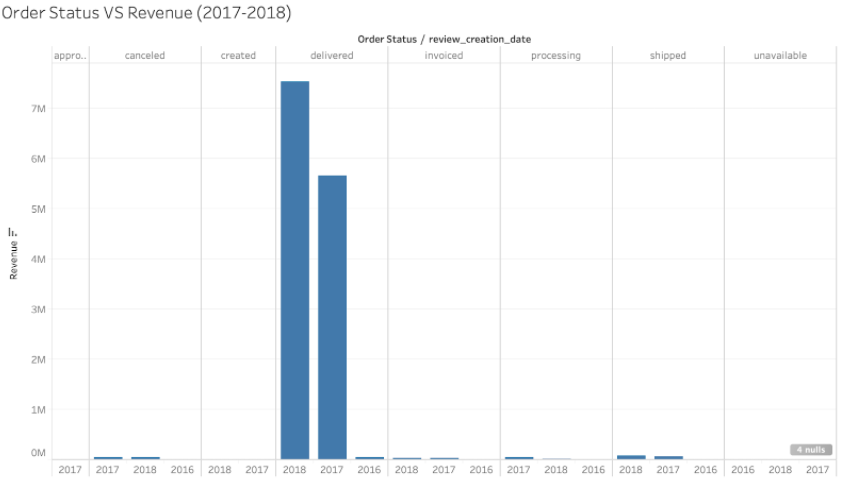

**Insight: Almost every order has the order status delivered. This shows that Olist is completing its orders and that there is not much canceled orders or orders stuck as WIP**

# **Polynomial Regression -- Relationship of Revenue to Continuous Attributes**

Organized the data to prepare for loading onto RapidMiner


In [ ]:
ordersframe = pd.read_csv('olist_orders_dataset.csv')
orderreviewsframe = pd.read_csv('olist_order_reviews_dataset.csv')
orderitemsframe = pd.read_csv('olist_order_items_dataset.csv')
orderpaymentsframe = pd.read_csv('olist_order_payments_dataset.csv')

revtocontattributes = pysql.sqldf("SELECT i.order_id, r.review_score, pay.payment_sequential, pay.payment_installments, i.freight_value, SUM(i.price) AS revenue \
FROM ordersframe o JOIN orderitemsframe i ON o.order_id = i.order_id JOIN orderreviewsframe r ON o.order_id = r.order_id JOIN orderpaymentsframe pay \
GROUP BY i.order_id,r.review_score, pay.payment_sequential, pay.payment_installments, i.freight_value \
ORDER BY i.order_id, r.review_score, pay.payment_sequential, pay.payment_installments, i.freight_value;")
print(revtocontattributes)

Note: Above code takes a while to load via pandasql. Below is a screenshot from running the sql on Google BigQuery

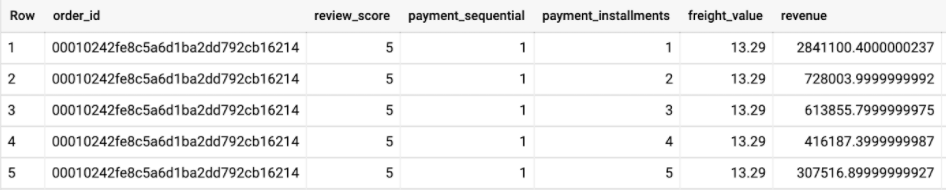

Result from RapidMiner:

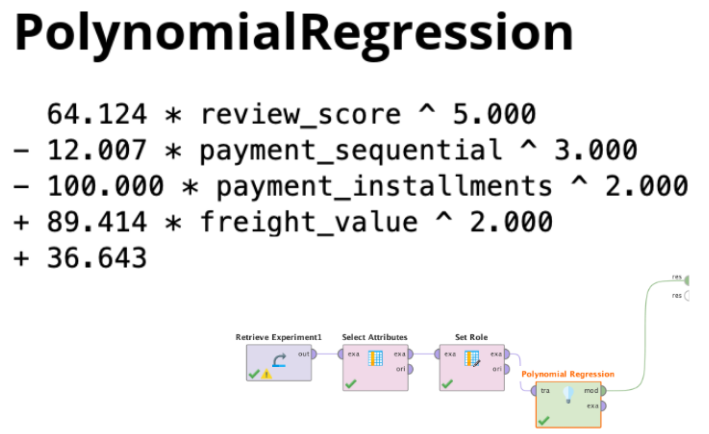

**Insight and Considerations:**

1) Order status is categorical data -- it cannot be used here

2) Only review score and freight value have positive strengths



## **Key Findings**

1) Payment sequential, payment installments, and freight value correlate to sales outcome but do not predict it -- higher priced items tend to have higher shipping values because they involve either premium shipping or are heavy items

2) Review scores do predict sales outcome

# **Are the sale of products affected after positive/negative reviews? Do negative reviews result in loss of customers?**

# **Effects of Review Score on Revenue (2016-2018)**
Tableau

Create a bin for “review score”

Select “review score - bin” and year for “review creation date” on Columns, and “sum(price)” on Rows

Select year “review creation date” on Marks with color


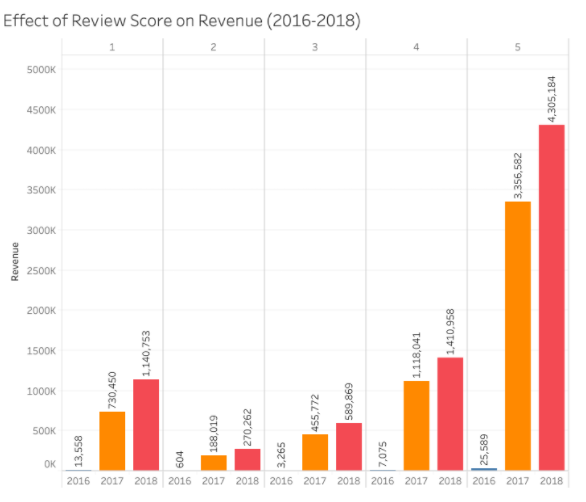

**Insight: Revenue increases as we reach higher review scores. However, this is misleading because popular items naturally translate into a higher count and range of review scores**

In [39]:
#Top 3 products with the most negative review scores (1 and 2)
ordersframe = pd.read_csv('olist_orders_dataset.csv')
productsframe = pd.read_csv('olist_products_dataset.csv')
orderitemsframe = pd.read_csv('olist_order_items_dataset.csv')
orderreviewsframe = pd.read_csv('olist_order_reviews_dataset.csv')

prodnegrevscore = pysql.sqldf("SELECT pd.product_id, COUNT(rd.review_score) \
FROM ordersframe od JOIN productsframe pd JOIN orderitemsframe oi ON od.order_id = oi.order_id and oi.product_id = pd.product_id JOIN orderreviewsframe rd ON od.order_id = rd.order_id AND \
od.order_purchase_timestamp BETWEEN '2016-01-01 00:00:00 UTC' AND '2018-12-30 00:00:00 UTC' AND (rd.review_score = 1 OR rd.review_score = 2) \
Group BY pd.product_id order by COUNT(rd.review_score) desc;")
print(prodnegrevscore)

                            product_id  COUNT(rd.review_score)
0     422879e10f46682990de24d770e7f83d                      96
1     99a4788cb24856965c36a24e339b6058                      86
2     53759a2ecddad2bb87a079a1f1519f73                      78
3     368c6c730842d78016ad823897a372db                      76
4     aca2eb7d00ea1a7b8ebd4e68314663af                      76
...                                ...                     ...
9280  ffbfa9e143fda4420454d0f4e88a3cd5                       1
9281  ffc0b406806006602c5853b00ab5f7fd                       1
9282  ffd60d515c690a976c497e75cd2336f4                       1
9283  fff1059cd247279f3726b7696c66e44e                       1
9284  fff28f91211774864a1000f918ed00cc                       1

[9285 rows x 2 columns]


In [40]:
ordersframe = pd.read_csv('olist_orders_dataset.csv')
productsframe = pd.read_csv('olist_products_dataset.csv')
orderitemsframe = pd.read_csv('olist_order_items_dataset.csv')
orderreviewsframe = pd.read_csv('olist_order_reviews_dataset.csv')

prodposrevscore = pysql.sqldf("SELECT pd.product_id, COUNT(rd.review_score) \
FROM ordersframe od JOIN productsframe pd JOIN orderitemsframe oi ON od.order_id = oi.order_id and oi.product_id = pd.product_id JOIN orderreviewsframe rd ON od.order_id = rd.order_id AND \
od.order_purchase_timestamp BETWEEN '2016-01-01 00:00:00 UTC' AND '2018-12-30 00:00:00 UTC' AND (rd.review_score = 4 OR rd.review_score = 5) \
Group BY pd.product_id order by COUNT(rd.review_score) desc;")
print(prodposrevscore)

                             product_id  COUNT(rd.review_score)
0      aca2eb7d00ea1a7b8ebd4e68314663af                     388
1      422879e10f46682990de24d770e7f83d                     362
2      99a4788cb24856965c36a24e339b6058                     336
3      389d119b48cf3043d311335e499d9c6b                     301
4      368c6c730842d78016ad823897a372db                     287
...                                 ...                     ...
27609  ffeb228c521d5464d1f71444da96c446                       1
27610  fff515ea94dbf35d54d256b3e39f0fea                       1
27611  fff81cc3158d2725c0655ab9ba0f712c                       1
27612  fff9553ac224cec9d15d49f5a263411f                       1
27613  fffe9eeff12fcbd74a2f2b007dde0c58                       1

[27614 rows x 2 columns]


# **Number of 4 and 5 star reviews vs Revenue (2017-2018)**

Tableau

Create a bin for “review score” 

Filter out products by each total review score 

Selected top 3 products with review scores of 4 and 5 and aggregated the count of their review scores 

Select “review score - bin” and “review_creation_data” for reviews in 2017 and 2018 in columns and “revenue” in rows 

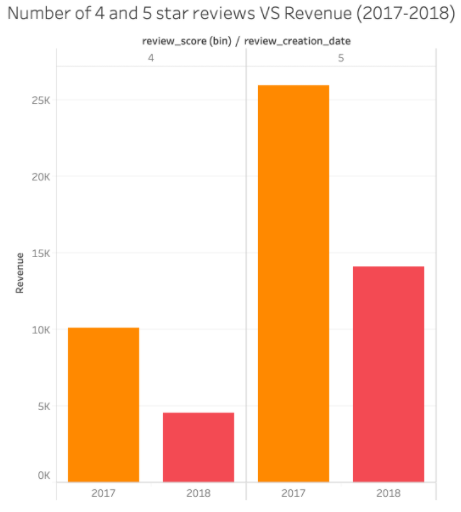



**Insight: There is a decrease in revenue between 2017 and 2018. However, a positive correlation between review scores and revenue cannot be concluded because of confounding variables such as the nature and popularity of the items.**

# **Number of 1 and 2 star reviews vs Revenue (2017-2018)**

Tableau

Create a bin for “review score” 

Filter out products by each total review score 

Selected top 3 products with review scores of 1 and 2 and aggregated the count of their review scores 

Select “review score - bin” and “review_creation_data” for reviews in 2017 and 2018 in columns and “revenue” in rows 

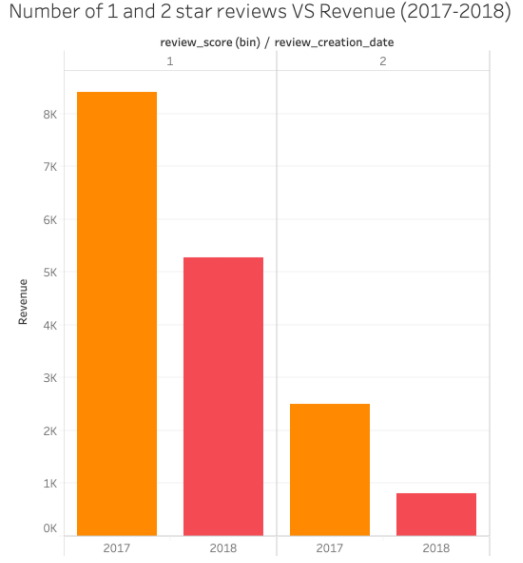

**Insight: There is a decrease in revenue from 2017 to 2018.**

# **The Effect of Negative Review Scores**

**Percentage Breakdown of Top 2 Product IDs with highest count of Negative Review Scores**

Tableau

Select the year for “order purchase timestamp” on Columns and count of “review score” on Rows

Select “review score” as Color for Marks

Create a filter for product id “422879e10f46682990de24d770e7f83d” and “53759a2ecddad2bb87a079a1f1519f73”


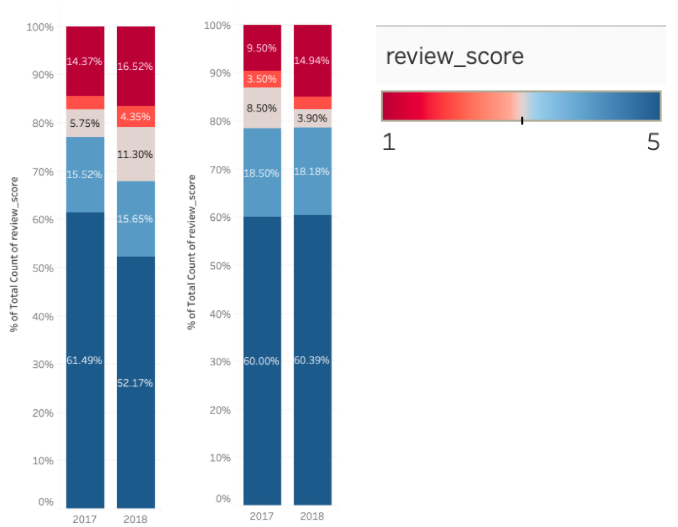

**Revenue of Top 2 Product IDs with highest ratio of Negative Review Scores**

Tableau

Create a bin for review score 

Select “review score - bin” and year for “review creation date” on Columns, and “sum(price)” on Rows

Select year “review creation date” on Marks with color

Create filter with product id “422879e10f46682990de24d770e7f83d” and “53759a2ecddad2bb87a079a1f1519f73”


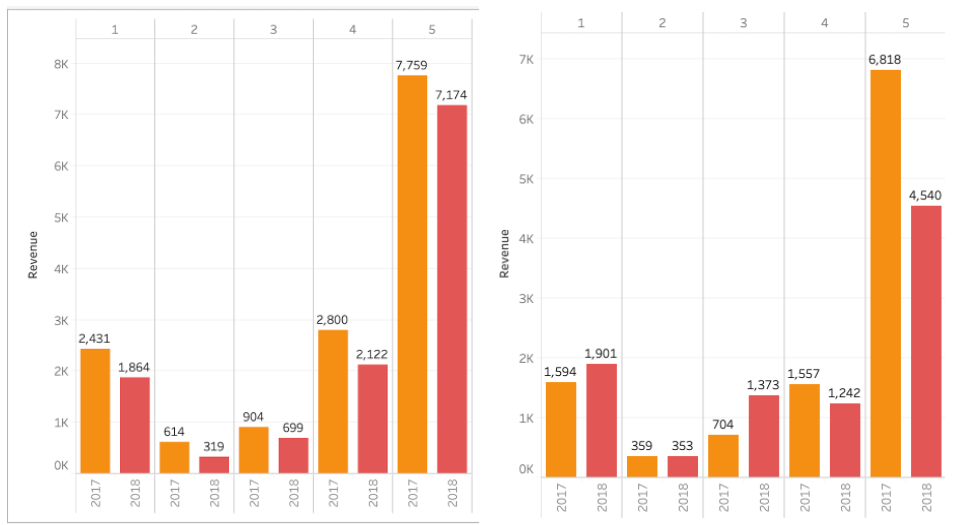

**Insight: As revenue generally decreased from 2017 to 2018, negative reviews have an effect on revenue.**

# **The Effect of Positive Review Scores**

**Percentage Breakdown of Top 2 Product IDs with highest count of Positve Review Scores**

Tableau

Select the year for “order purchase timestamp” on Columns and count of “review score” on Rows

Select “review score” as Color for Marks

Create a filter for product id “aca2eb7d00ea1a7b8ebd4e68314663af” and “368c6c730842d78016ad823897a372db”


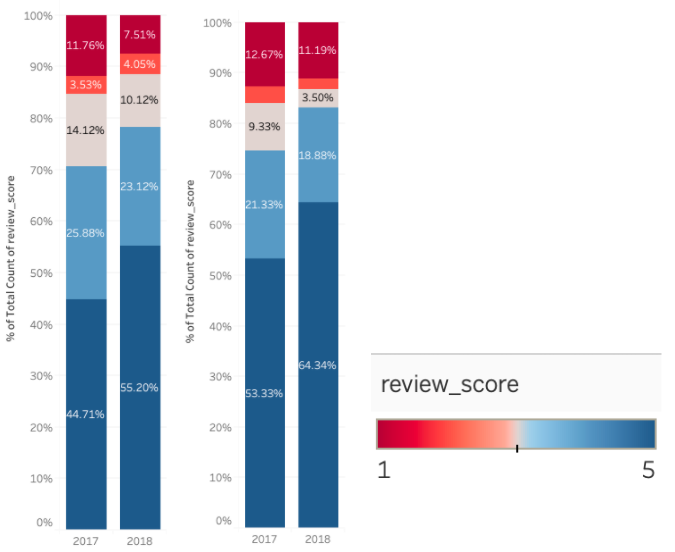

**Revenue of Top 2 Product IDs with highest ratio of Positive Review Scores**

Tableau 

Create a bin for review score 

Select “review score - bin” and year for “review creation date” on Columns, and “sum(price)” on Rows

Select year “review creation date” on Marks with color

Create a filter for product id “aca2eb7d00ea1a7b8ebd4e68314663af” and “368c6c730842d78016ad823897a372db”


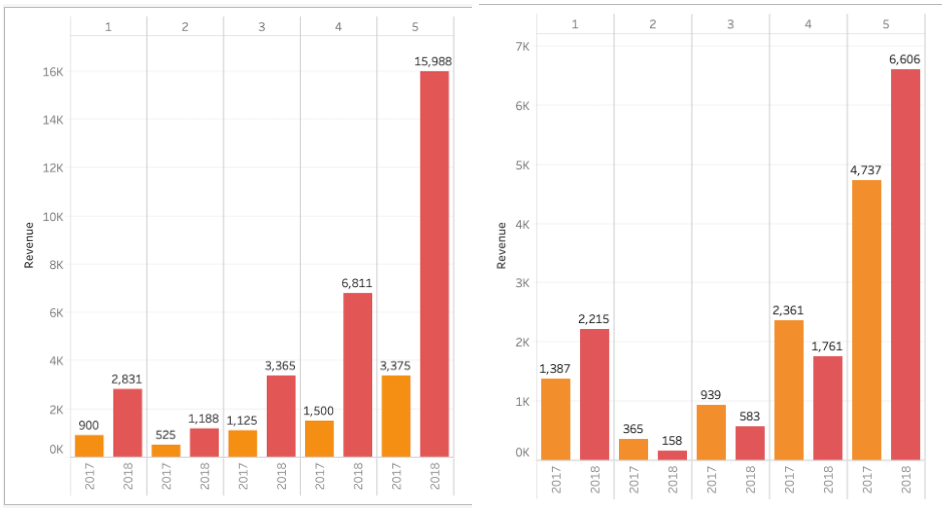

**Insight: Revenue and the ratio of good reviews increased, indicating positive review scores affect revenue**

# **Conclusion:** Negative review scores would result in more negative review scores in the future (same trend with positive review scores).This goes along with the revenue, as those with more negative review scores see a decrease in revenue and those with more positive reviews see an increase in revenue.
